In [ ]:
# Import fundamental packages
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
# Mount the Google Drive into Colab to use the drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The location of the csv file in Google Drive
csv_location = './drive/MyDrive/Datasets/CSE445/house_4/' 

In [ ]:
sorted(os.listdir(csv_location))

['channel_1.csv',
 'channel_2.csv',
 'channel_3.csv',
 'channel_4.csv',
 'channel_5.csv',
 'channel_6.csv']

In [ ]:
dataframes = []
for filename in sorted(os.listdir(csv_location)):
  # if filename == 'channel_1.csv': continue
  dataframe = pd.read_csv(csv_location+'/'+filename)
  dataframe.columns = ['timestamp', 'load_consumption']
  dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"],unit='s')
  dataframe = dataframe.set_index("timestamp")
  dataframes.append(dataframe)

In [ ]:
for dataframe in dataframes:
  print(dataframe.info)

<bound method DataFrame.info of                      load_consumption
timestamp                            
2013-03-09 14:40:13               625
2013-03-09 14:40:19               625
2013-03-09 14:40:25               622
2013-03-09 14:40:32               641
2013-03-09 14:40:38               633
...                               ...
2013-10-01 05:14:43               266
2013-10-01 05:14:49               270
2013-10-01 05:14:55               272
2013-10-01 05:15:01               268
2013-10-01 05:15:07               270

[2186445 rows x 1 columns]>
<bound method DataFrame.info of                      load_consumption
timestamp                            
2013-03-09 14:40:19                13
2013-03-09 14:40:25                13
2013-03-09 14:40:31                13
2013-03-09 14:40:37                13
2013-03-09 14:40:43                13
...                               ...
2013-10-01 05:14:43                15
2013-10-01 05:14:49                15
2013-10-01 05:14:55              

# Plot the full dataframe

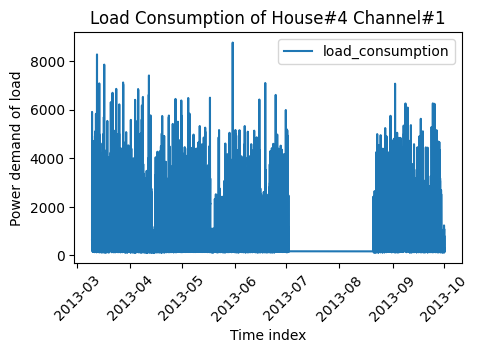

2186445


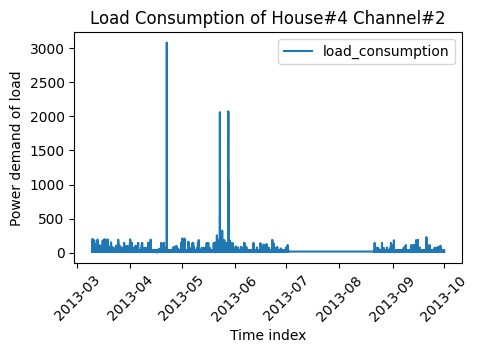

2156166


KeyboardInterrupt: ignored

<Figure size 500x300 with 0 Axes>

In [ ]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index])
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Finding the Missing data handle graphs


In [ ]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index][:int(len(dataframes[index])*0.6)])
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Resampling 

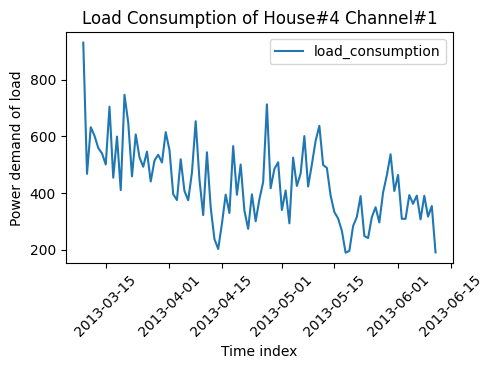

95


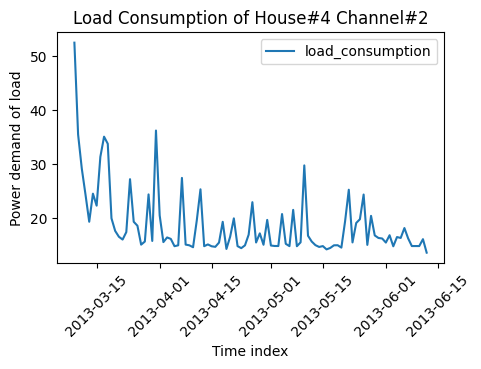

96


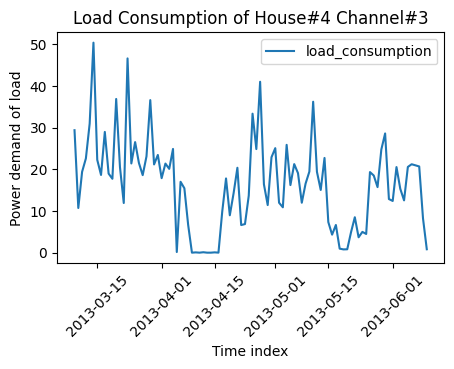

94


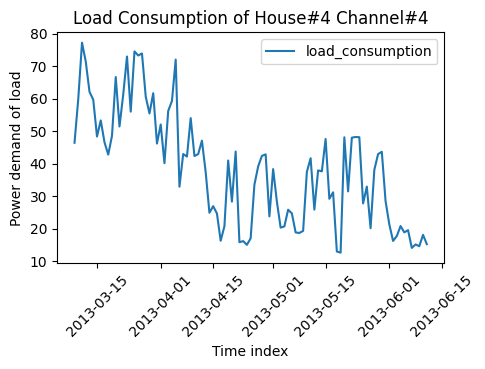

95


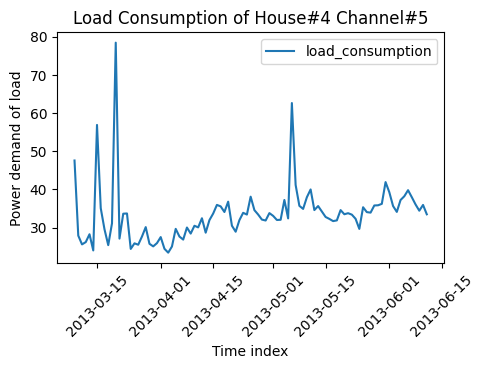

95


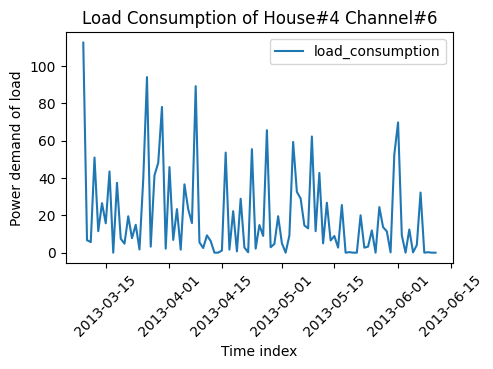

95


In [ ]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  resample_rule='24H'
  current_in_hand_data_working=(dataframes[index][:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Finding out resampling data points reduction

In [ ]:
resampling_sample_rates = ['1H', '6H', '12H', '24H']
for sample_rate in resampling_sample_rates:
  for i in range(6):
    index = i
    resample_rule=sample_rate
    current_in_hand_data_working=(dataframes[index][:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()
    print('sample_rate:', resample_rule, f'channel#{i+1}','datapoints:',len(current_in_hand_data_working))
  
  print("")

sample_rate: 1H channel#1 datapoints: 2246
sample_rate: 1H channel#2 datapoints: 2279
sample_rate: 1H channel#3 datapoints: 2225
sample_rate: 1H channel#4 datapoints: 2251
sample_rate: 1H channel#5 datapoints: 2253
sample_rate: 1H channel#6 datapoints: 2259

sample_rate: 6H channel#1 datapoints: 375
sample_rate: 6H channel#2 datapoints: 381
sample_rate: 6H channel#3 datapoints: 372
sample_rate: 6H channel#4 datapoints: 376
sample_rate: 6H channel#5 datapoints: 376
sample_rate: 6H channel#6 datapoints: 377

sample_rate: 12H channel#1 datapoints: 188
sample_rate: 12H channel#2 datapoints: 191
sample_rate: 12H channel#3 datapoints: 186
sample_rate: 12H channel#4 datapoints: 188
sample_rate: 12H channel#5 datapoints: 188
sample_rate: 12H channel#6 datapoints: 189

sample_rate: 24H channel#1 datapoints: 95
sample_rate: 24H channel#2 datapoints: 96
sample_rate: 24H channel#3 datapoints: 94
sample_rate: 24H channel#4 datapoints: 95
sample_rate: 24H channel#5 datapoints: 95
sample_rate: 24H ch

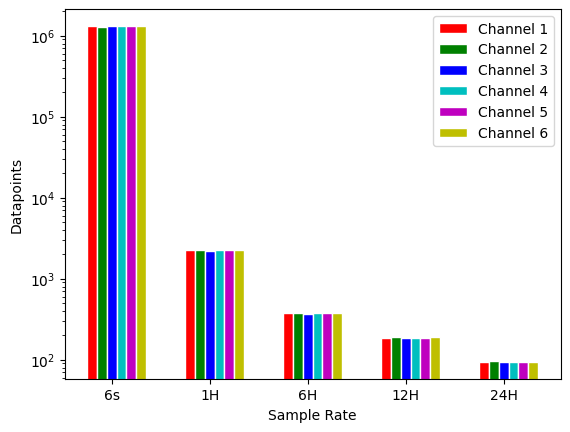

In [ ]:
# Define the data
sample_rates = ['6s', '1H', '6H', '12H', '24H']
channel1_datapoints = [1311867, 2246, 375, 188, 95]
channel2_datapoints = [1293699, 2279, 381, 191, 96]
channel3_datapoints = [1303061, 2225, 372, 186, 94]
channel4_datapoints = [1318878, 2251, 376, 188, 95]
channel5_datapoints = [1316917, 2253, 376, 188, 95]
channel6_datapoints = [1308497, 2259, 377, 189, 95]

# Set the width of the bars
barWidth = 0.1

# Set the position of the bars on the x-axis
r1 = [x for x in range(len(sample_rates))]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Create the bar chart
plt.bar(r1, channel1_datapoints, color='r', width=barWidth, edgecolor='white', label='Channel 1')
plt.bar(r2, channel2_datapoints, color='g', width=barWidth, edgecolor='white', label='Channel 2')
plt.bar(r3, channel3_datapoints, color='b', width=barWidth, edgecolor='white', label='Channel 3')
plt.bar(r4, channel4_datapoints, color='c', width=barWidth, edgecolor='white', label='Channel 4')
plt.bar(r5, channel5_datapoints, color='m', width=barWidth, edgecolor='white', label='Channel 5')
plt.bar(r6, channel6_datapoints, color='y', width=barWidth, edgecolor='white', label='Channel 6')

# Add xticks on the middle of the group bars
plt.xlabel('Sample Rate')
plt.ylabel('Datapoints')
plt.yscale('log')
plt.xticks([r + 2*barWidth for r in range(len(sample_rates))], sample_rates)

# Create a legend & Show graphic
plt.legend()
plt.show()

# Lets find out the seasonal decompose graph

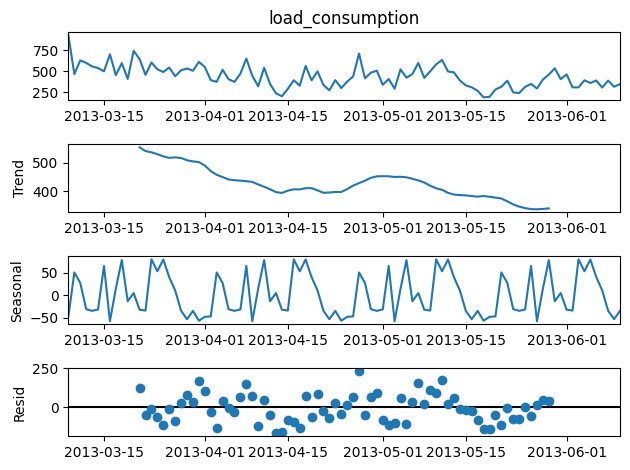

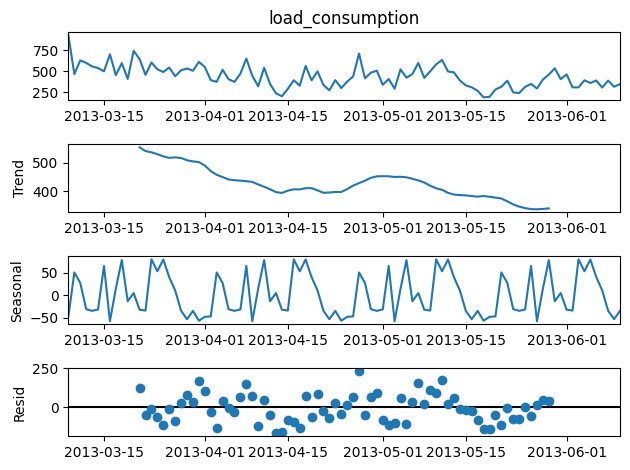

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result = seasonal_decompose(dataframes[0][:int(len(dataframes[index])*0.6)].resample('24H').mean()['load_consumption'],period=24)

# Plot
result.plot()

# Finding the ACF and PACF

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


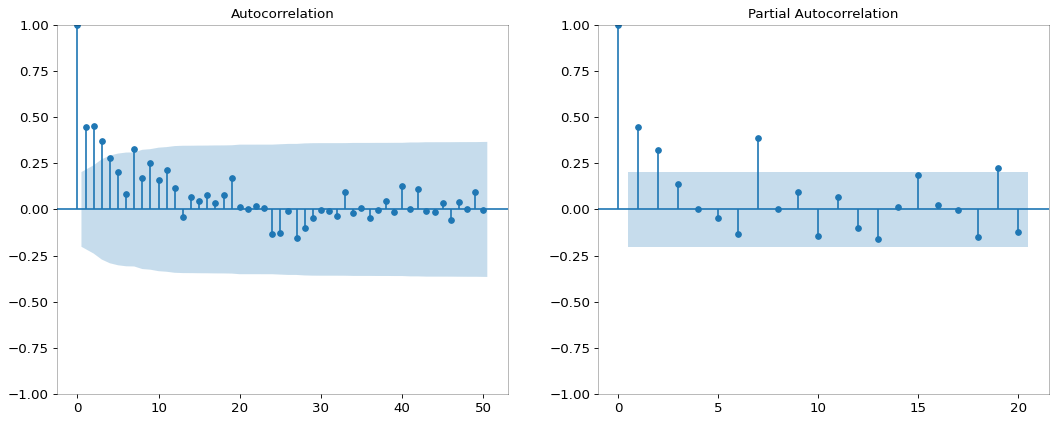

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
df = dataframes[0][:int(len(dataframes[index])*0.6)].resample('24H').mean()['load_consumption']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df, ax=ax1, lags=50)
plot_pacf(df, ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# Finding out the Pie Charts monthwise

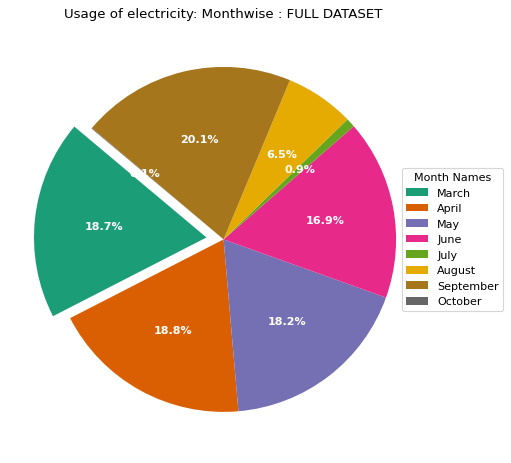

In [ ]:
# Prepare Data
df = dataframes[0].resample('M').sum()

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['load_consumption']
categories = df.index.month_name()
explode = [0.1,0,0,0,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Month Names", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Usage of electricity: Monthwise : FULL DATASET")
plt.show()

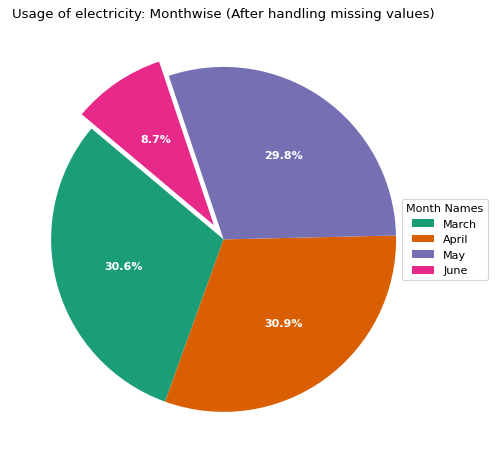

In [ ]:
# Prepare Data
df = dataframes[0][:int(len(dataframes[index])*0.6)].resample('M').sum()

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['load_consumption']
categories = df.index.month_name()
explode = [0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Month Names", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Usage of electricity: Monthwise (After handling missing values)")
plt.show()

# Plotting the every channel into a single plot

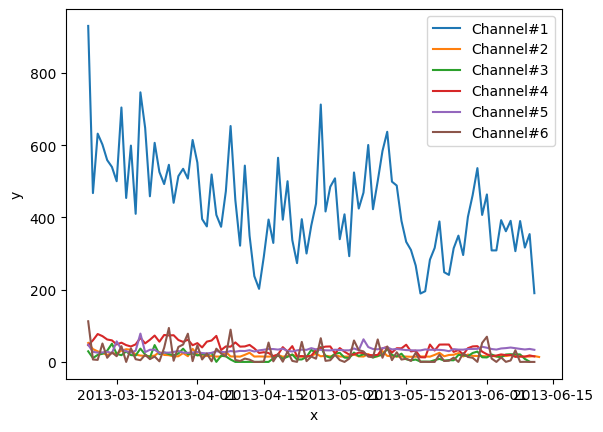

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots()

for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index][:int(len(dataframes[index])*0.6)]).resample('24H').mean()
   
  # Plot the three lines on the same plot
  ax.plot(current_in_hand_data_working.index, current_in_hand_data_working['load_consumption'], label=f'Channel#{i+1}')

# Add legend, x-label, and y-label
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

# Finding out the avg weekly behaviour

<ipython-input-137-e59795a25952>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days_of_week)


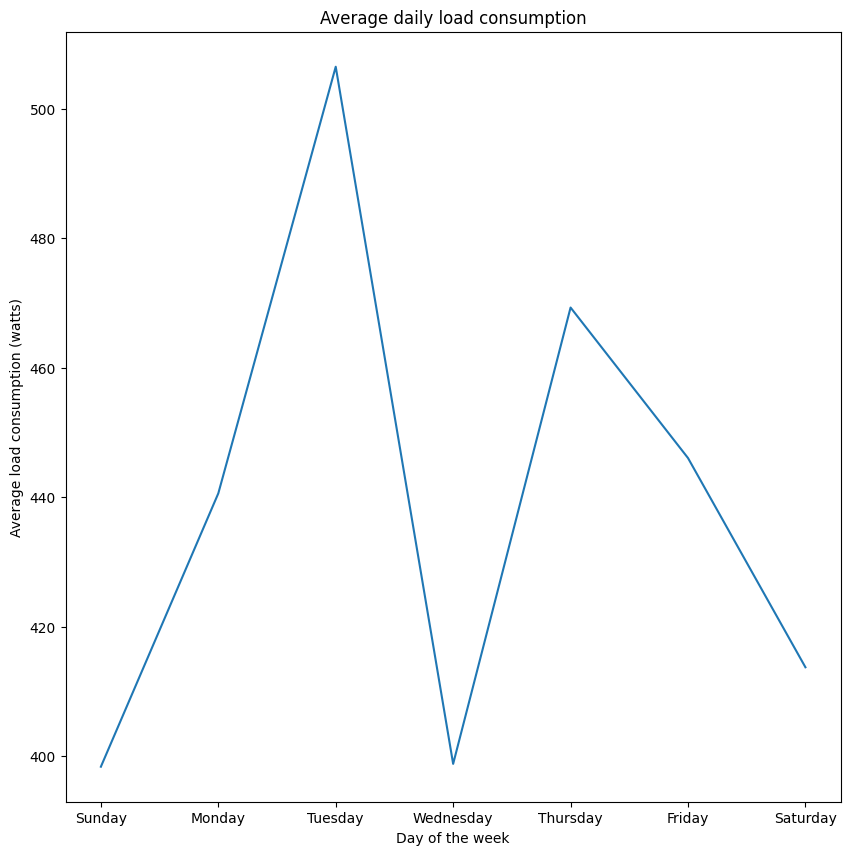

In [ ]:
# Resample the data to daily frequency and compute the average load consumption for each day
df_daily = (dataframes[0][:int(len(dataframes[index])*0.6)]).resample('24H').mean()

# Create a new column with the name of the day of the week
df_daily['day'] = df_daily.index.day_name()

# Group the data by the day of the week and compute the average load consumption for each day of the week
df_grouped = df_daily.groupby('day').mean()

# Define the x-axis ticks as the days of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the plot using matplotlib
fig, ax = plt.subplots()
ax.plot(df_grouped.index, df_grouped['load_consumption'])
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the week')
ax.set_ylabel('Average load consumption (watts)')
ax.set_title('Average daily load consumption')
plt.show()

In [ ]:
daily_data.index.min()

Timestamp('2013-03-09 00:00:00', freq='D')

# Model: AutoARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

Total training datapoints: 112
Total testing datapoints: 29


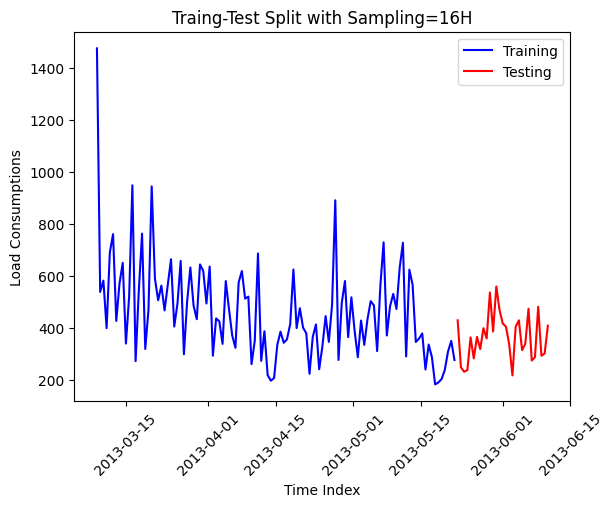

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=1463.659, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1517.330, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1495.587, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1463.177, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1515.594, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=1462.580, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=1464.119, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=1462.051, Time=0.30 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=1457.655, Time=0.41 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=1457.222, Time=0.33 sec
 ARIMA(0,1,1)(3,0,0)[4] intercept   : AIC=1458.284, Time=0.44 sec
 ARIMA(0,1,1)(3,0,1)[4] intercept   : AIC=1459.598, Time=0.65 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=1505.271, Time=0.13 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=1457.213, Time=0.40 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept

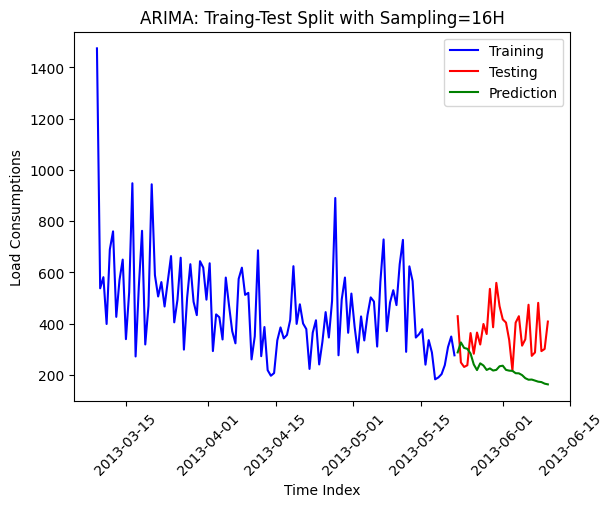

In [ ]:
resample_rule='16H'
target_channel = 0
current_in_hand_data_working=(dataframes[target_channel][:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()

# Train Test Split 80-20
data_to_train_on = current_in_hand_data_working[0:int(len(current_in_hand_data_working)*0.8)]
data_to_test_on = current_in_hand_data_working[int(len(current_in_hand_data_working)*0.8):]
print("Total training datapoints:", len(data_to_train_on))
print("Total testing datapoints:", len(data_to_test_on))

# Plot the training+testing figure
plt.plot(data_to_train_on.index, data_to_train_on['load_consumption'], color='blue', label='Training')
plt.plot(data_to_test_on.index, data_to_test_on['load_consumption'], color='red', label='Testing')
plt.title('Traing-Test Split with Sampling='+resample_rule)
plt.xlabel('Time Index')
plt.ylabel('Load Consumptions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Get the y-values
y_train = np.nan_to_num(data_to_train_on.load_consumption.values, nan=0.0)
y_test = np.nan_to_num(data_to_test_on.load_consumption.values, nan=0.0)

# Run AutoArima
model = auto_arima( 
    y_train,
    X=None,
    start_p=1,
    d=None,  # Must, in order to iterate over 'd' (number of differencing)
    start_q=1,
    max_p=5,
    max_d=5,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=5,
    max_D=5,
    max_Q=5,
    max_order=200,
    m=4,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='adf',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=True,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept="auto",
    sarimax_kwargs=None
)
print(model.summary())

forecasts = model.predict(len(y_test)) 

# Plot the training+testing=prediction figure
plt.plot(data_to_train_on.index, data_to_train_on['load_consumption'], color='blue', label='Training')
plt.plot(data_to_test_on.index, data_to_test_on['load_consumption'], color='red', label='Testing')
plt.plot(data_to_test_on.index, forecasts, color='green', label='Prediction')
plt.title('ARIMA: Traing-Test Split with Sampling='+resample_rule)
plt.xlabel('Time Index')
plt.ylabel('Load Consumptions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Model: LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.sequence_length = sequence_length
        self.data = self._prepare_data(data)

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.sequence_length]
        y = self.data[idx+self.sequence_length]
        return x, y

    def _prepare_data(self, data):
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_scaled = scaler.fit_transform(data)

        return torch.FloatTensor(data_scaled)


In [ ]:
class LSTMForecastModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMForecastModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        output = self.fc(hidden[-1])
        return output


In [ ]:
def train(model, dataloader, criterion, optimizer, num_epochs):
    model.train()
    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(dataloader)
        losses.append(epoch_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}")

    # Plot the loss curve
    plt.figure(figsize=(4, 3))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('LSTM: Training Loss Curve')
    plt.show()

def test(model, dataloader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, targets_batch in dataloader:
            outputs = model(inputs)
            predictions.append(outputs.numpy())
            targets.append(targets_batch.numpy())

    predictions = np.concatenate(predictions)
    targets = np.concatenate(targets)

    rmse = np.sqrt(mean_squared_error(targets, predictions))
    print(f"Test RMSE: {rmse:.6f}")

    # Plot the training, testing actual, and testing predicted data
    training_actual = train_dataset._prepare_data(train_data).numpy()
    testing_actual = train_dataset._prepare_data(targets).numpy()
    testing_predicted = train_dataset._prepare_data(predictions).numpy()
    
    plot_time_series(training_actual, testing_actual, testing_predicted, 'LSTM: Actual vs Predicted')

In [ ]:
def plot_time_series(training_actual, testing_actual, testing_predicted, title):
    plt.figure(figsize=(4, 3))
    plt.plot(range(len(training_actual)), training_actual, color='blue', label='Training Actual')
    plt.plot(range(len(training_actual), len(training_actual) + len(testing_actual)),
             testing_actual, color='green', label='Testing Actual')
    plt.plot(range(len(training_actual), len(training_actual) + len(testing_actual)),
             testing_predicted.flatten(), color='red', label='Testing Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

Epoch 1/100, Loss: 0.019831
Epoch 2/100, Loss: 0.018084
Epoch 3/100, Loss: 0.016827
Epoch 4/100, Loss: 0.016021
Epoch 5/100, Loss: 0.015613
Epoch 6/100, Loss: 0.015512
Epoch 7/100, Loss: 0.015585
Epoch 8/100, Loss: 0.015690
Epoch 9/100, Loss: 0.015731
Epoch 10/100, Loss: 0.015684
Epoch 11/100, Loss: 0.015576
Epoch 12/100, Loss: 0.015451
Epoch 13/100, Loss: 0.015346
Epoch 14/100, Loss: 0.015277
Epoch 15/100, Loss: 0.015244
Epoch 16/100, Loss: 0.015237
Epoch 17/100, Loss: 0.015240
Epoch 18/100, Loss: 0.015241
Epoch 19/100, Loss: 0.015231
Epoch 20/100, Loss: 0.015209
Epoch 21/100, Loss: 0.015179
Epoch 22/100, Loss: 0.015144
Epoch 23/100, Loss: 0.015109
Epoch 24/100, Loss: 0.015078
Epoch 25/100, Loss: 0.015050
Epoch 26/100, Loss: 0.015023
Epoch 27/100, Loss: 0.014994
Epoch 28/100, Loss: 0.014963
Epoch 29/100, Loss: 0.014929
Epoch 30/100, Loss: 0.014892
Epoch 31/100, Loss: 0.014856
Epoch 32/100, Loss: 0.014821
Epoch 33/100, Loss: 0.014786
Epoch 34/100, Loss: 0.014752
Epoch 35/100, Loss: 0.0

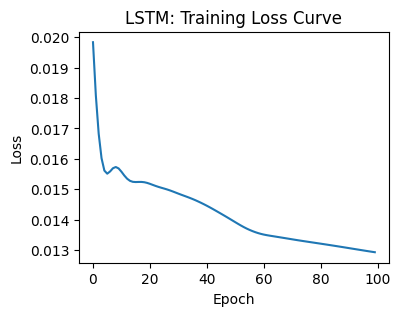

Test RMSE: 0.299970


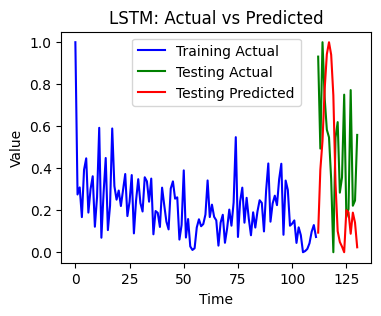

In [ ]:
resample_rule='16H'
target_channel = 0
current_in_hand_data_working=(dataframes[target_channel][:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()

# # Train Test Split 80-20
# data_to_train_on = current_in_hand_data_working[0:int(len(current_in_hand_data_working)*0.8)]
# data_to_test_on = current_in_hand_data_working[int(len(current_in_hand_data_working)*0.8):]
# print("Total training datapoints:", len(data_to_train_on))
# print("Total testing datapoints:", len(data_to_test_on))

# Load your DataFrame and preprocess it
data = current_in_hand_data_working['load_consumption'].values.reshape(-1, 1)

# Split the data into train and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define hyperparameters
sequence_length = 10
input_size = 1
hidden_size = 32
output_size = 1
batch_size = 64
num_epochs = 100
learning_rate = 0.001

# Create the datasets and data loaders
train_dataset = TimeSeriesDataset(train_data, sequence_length)
test_dataset = TimeSeriesDataset(test_data, sequence_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LSTMForecastModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train(model, train_dataloader, criterion, optimizer, num_epochs)

# Test the model
test(model, test_dataloader)
